# 1. Создание входных данных


Centers:
{1: [10, 5], 2: [7, 8], 3: [13, 18]}


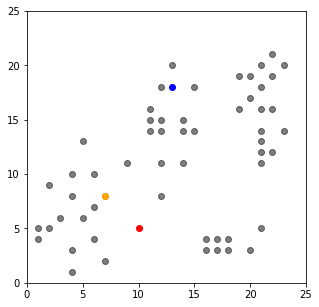

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

N = 80 # count of points or blobs

# --- Blobs---
data = make_blobs(n_samples=N, n_features=2, centers=5, cluster_std=1.6, random_state=5) # Создаем рандомные точки
points = data[0]

# ---DataFrame--- & ---Centroids---
k = 3
centroids = {
    i+1: [np.random.randint(0, 24), np.random.randint(0, 22)]
    for i in range(k)
}

# np.random.seed(200) # чтобы получать каждый раз разные входные точки, закоментируйте эту строку
# рандомные точки
# df = pd.DataFrame({
#     'x': [np.random.randint(1,24) for _ in range(N)],
#     'y': [np.random.randint(1,24) for _ in range(N)]
# })

# строго определенные точки
df = pd.DataFrame({
    'x': [1,1,2,2,4,4,4,4,3,5,5,6,6,6,7,7,9,11,11,11,12,12,12,12,12,13,14,14,14,15,15,16,16,17,17,18,18,19,19,20,20,20,21,21,21,21,21,21,21,21,22,22,22,22,23,23],
    'y': [4,5,5,9,1,3,8,10,6,6,13,4,7,10,2,8,11,14,15,16,8,11,14,15,18,20,11,14,15,14,18,3,4,3,4,3,4,16,19,3,17,19,5,11,12,13,14,16,18,20,12,16,19,21,14,20]
})

colmap = {1: 'r', 2: 'orange', 3: 'b'}

print("\nCenters:")
print(centroids)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='black', alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.show()

# 2. Кластеризация

## 2.1 Метод k-средних (вручную)

{1: [10, 5], 2: [7, 8], 3: [13, 18]}


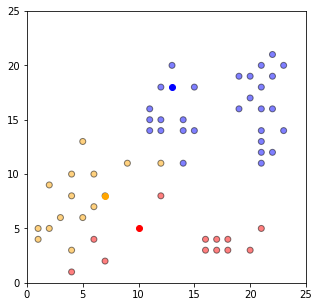

{1: [14.333333333333334, 3.6666666666666665], 2: [4.733333333333333, 7.733333333333333], 3: [17.689655172413794, 15.89655172413793]}


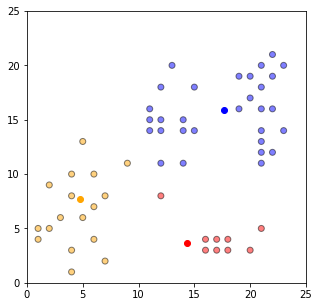

{1: [17.22222222222222, 4.111111111111111], 2: [4.470588235294118, 6.588235294117647], 3: [17.5, 15.733333333333333]}


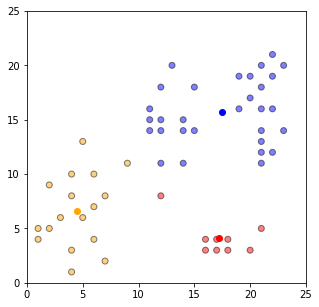

In [5]:
import copy

def assignment(df, centroids):
    # расчет Евклидового расстояния от каждой точки к каждому центру кластера
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    # распределение точек по кластерам и задание цвета
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

def update(df, centroids):
    # обновление центров кластера
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

def compare_dic(old, new):
    # сравнение словарей
    flag = True
    for i in range(1, k+1):
        if old[i] != new[i]:
            flag = False
    return flag

def display(df, centroids):
    # я думаю не надо пояснять что здесь
    print(centroids)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 25)
    plt.ylim(0, 25)
    plt.show()


# ---main---
# основная точка входа
while True:
    old_centroids = copy.deepcopy(centroids) # Запоминаем старое состояние центров
    df = assignment(df, centroids) # Расчет Евклидового расстояния
    display(df, centroids) # Вывод графика
    centroids = update(df, centroids) # Обновляем ценры с учетом новых (или не измененных, т.е. старых) расстояний
    if compare_dic(old_centroids, centroids): # Сравнение старых и новых центров
        break

## 2.2 Метод k-средних++ (with lib sklearn)

In [6]:
from sklearn.cluster import KMeans

print("Points: ")
print(points)

kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
y_km = kmeans.fit_predict(points)
centers = kmeans.cluster_centers_

print("\nCenters:")
print(centers)

Points: 
[[ 4.66612647e+00 -9.31839860e-01]
 [-2.12433652e+00 -7.26101943e+00]
 [-6.78963807e+00  1.02157458e+01]
 [-4.29125127e+00  6.40413152e+00]
 [ 4.71716378e+00 -1.90671952e+00]
 [-6.35498173e+00  7.60784789e+00]
 [-1.18915212e+00  1.84540574e+00]
 [ 6.62396891e+00 -8.19284365e-02]
 [-6.62350757e+00 -4.84213093e+00]
 [ 1.16447117e+00  1.91148817e+00]
 [-1.04411176e+01  9.63520441e+00]
 [-4.90756666e-01 -6.30109879e+00]
 [-6.95514327e+00  6.73863344e+00]
 [ 3.34633935e+00  1.53148497e+00]
 [ 4.72870188e+00 -3.23022925e+00]
 [ 7.63933080e+00  1.33935227e+00]
 [-2.86854582e+00 -3.90462266e+00]
 [ 5.39168549e+00 -4.11052475e-01]
 [-3.57502969e+00 -5.41061624e+00]
 [ 1.59463616e+00  1.43206838e+00]
 [-7.46855996e+00  7.08684371e+00]
 [-6.40375491e+00  8.21123520e+00]
 [-6.25075472e+00  7.05362063e+00]
 [-9.44464211e-01  1.46348496e+00]
 [ 2.68240736e+00  1.55162704e+00]
 [-3.58418402e-01  1.12635511e+00]
 [-4.04266813e+00  9.16332280e+00]
 [-5.09816051e+00 -5.36786689e+00]
 [ 3.963807

### 2.2.1 Графическое отображение конечного результата 

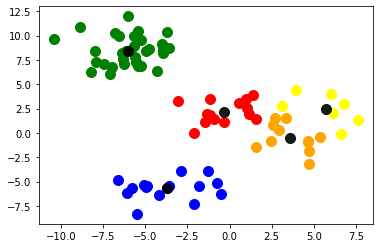

In [7]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='green')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='yellow')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], s=100, c='orange')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.9);


Centers:
[[17.5        15.73333333]
 [17.22222222  4.11111111]
 [ 4.47058824  6.58823529]]


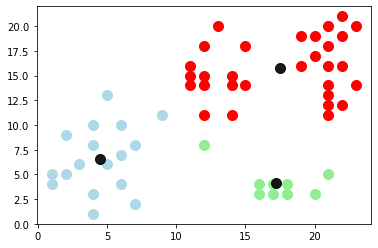

In [8]:
arr = [
    [1,4],
    [1,5],
    [2,5],
    [2,9],
    [4,1],
    [4,3],
    [4,8],
    [4,10],
    [3,6],
    [5,6],
    [5,13],
    [6,4],
    [6,7],
    [6,10],
    [7,2],
    [7,8],
    [9,11],
    [11,14],
    [11,15],
    [11,16],
    [12,8],
    [12,11],
    [12,14],
    [12,15],
    [12,18],
    [13,20],
    [14,11],
    [14,14],
    [14,15],
    [15,14],
    [15,18],
    [16,3],
    [16,4],
    [17,3],
    [17,4],
    [18,3],
    [18,4],
    [19,16],
    [19,19],
    [20,3],
    [20,17],
    [20,19],
    [21,5],
    [21,11],
    [21,12],
    [21,13],
    [21,14],
    [21,16],
    [21,18],
    [21,20],
    [22,12],
    [22,16],
    [22,19],
    [22,21],
    [23,14],
    [23,20]
]

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(arr)
y_km = kmeans1.fit_predict(arr)
centers = kmeans1.cluster_centers_

print("\nCenters:")
print(centers)

for i in range(len(arr)):
    if y_km[i] == 0:
        plt.scatter(arr[i][0], arr[i][1], s=100, c='red')
    elif y_km[i] == 1:
        plt.scatter(arr[i][0], arr[i][1], s=100, c='lightgreen')
    elif y_km[i] == 2:
        plt.scatter(arr[i][0], arr[i][1], s=100, c='lightblue')
    elif y_km[i] == 3:
        plt.scatter(arr[i][0], arr[i][1], s=100, c='yellow')
    elif y_km[i] == 4:
        plt.scatter(arr[i][0], arr[i][1], s=100, c='orange')
        
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.9);  